In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ages = [160, 11.2,117,108,160,49,120]
genewise_concordance = [3.06,22.5,1.67,1.66,.5,5.22,2.98]
orthogroupwise_concordance = [5.125,25,1.73,9.5,4,6,4.64]


In [3]:
plotting_df = pd.DataFrame(columns = ['Age','Genewise Condcordant Ratio','Orthogroupwise Concordant Ratio'], data = zip(ages,genewise_concordance,orthogroupwise_concordance) )
plotting_df

,Age,Genewise Condcordant Ratio,Orthogroupwise Concordant Ratio
0,160.0,3.06,5.125
1,11.2,22.50,25.000
2,117.0,1.67,1.730
3,108.0,1.66,9.500
4,160.0,0.50,4.000
5,49.0,5.22,6.000
6,120.0,2.98,4.640


In [4]:
plotting_df['Difference in Performance'] = plotting_df['Orthogroupwise Concordant Ratio'] - plotting_df['Genewise Condcordant Ratio']
plotting_df['Percent Improvement'] = plotting_df['Difference in Performance']/plotting_df['Genewise Condcordant Ratio']*100

In [5]:
plotting_df

,Age,Genewise Condcordant Ratio,Orthogroupwise Concordant Ratio,Difference in Performance,Percent Improvement
0,160.0,3.06,5.125,2.065,67.483660
1,11.2,22.50,25.000,2.500,11.111111
2,117.0,1.67,1.730,0.060,3.592814
3,108.0,1.66,9.500,7.840,472.289157
4,160.0,0.50,4.000,3.500,700.000000
5,49.0,5.22,6.000,0.780,14.942529
6,120.0,2.98,4.640,1.660,55.704698


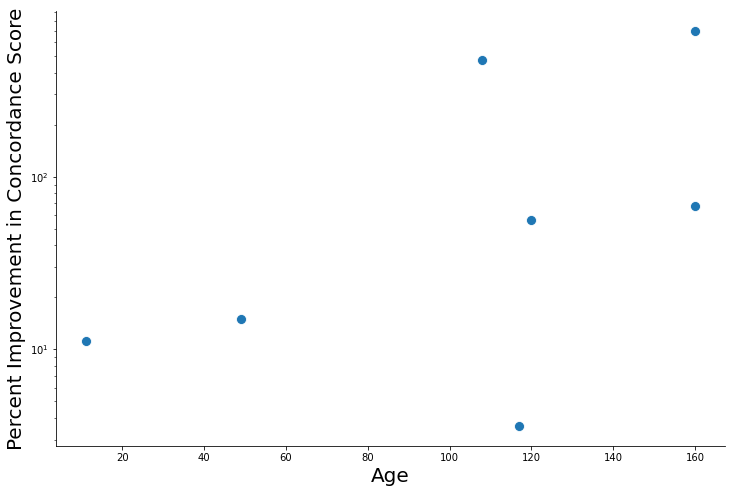

In [16]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
sns.scatterplot(data = plotting_df, x = 'Age',y = 'Percent Improvement', s = 100)
plt.xlabel("Age", fontsize = 20)
plt.ylabel("Percent Improvement in Concordance Score", fontsize = 20)
sns.despine()
ax.set(yscale = 'log')
ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.xlim((0,3))
#plt.ylim((0, 3))
#handles, labels  =  ax.get_legend_handles_labels()
#ax.legend(handles, ['Accepted Coexpressolog', 'Rejected Coexpressolog'], loc='lower right')
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 12, rotation = 25)
#plt.yticks(fontsize = 11)
#ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)